# Feature Detection using BRUTE FORCE BY ORB

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
def display(img,cmap = "gray"):
    fig = plt.figure(figsize = (12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap = 'gray')


In [43]:
reeses = cv2.imread("Computer-Vision-with-Python/DATA/reeses_puffs.png",0)

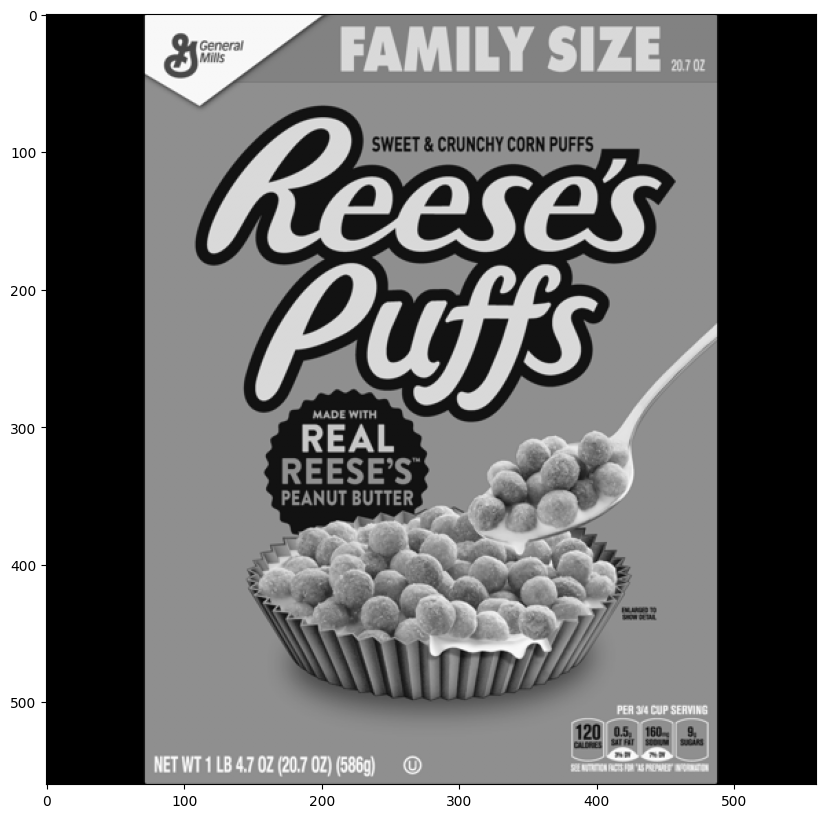

In [44]:
display(reeses)

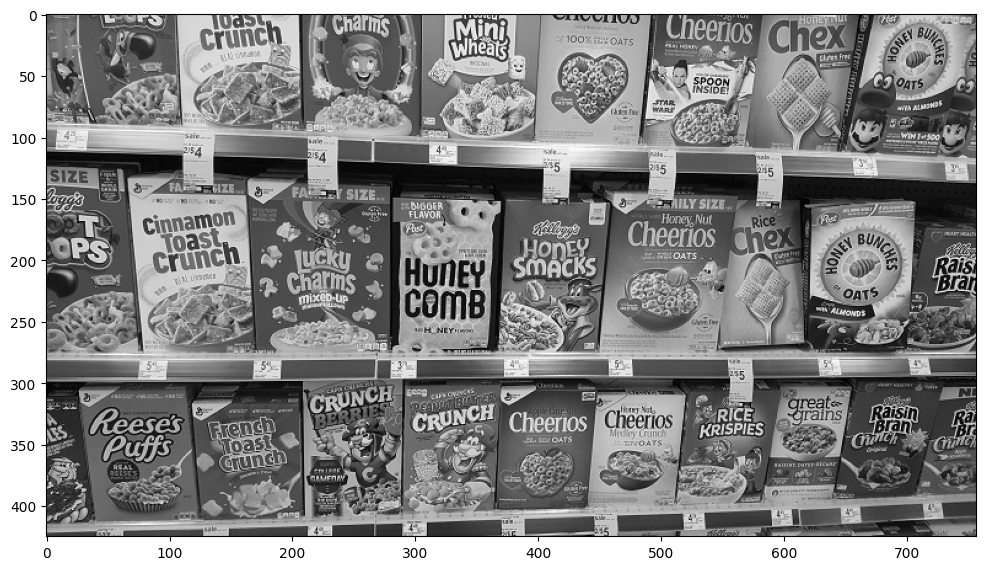

In [45]:
cereals = cv2.imread("Computer-Vision-with-Python\DATA\many_cereals.jpg",0)
display(cereals)

In [46]:
orb = cv2.ORB_create()  #This creates an ORB Object

In [47]:
# These lines detect the features and compute them and return KeyPoints and Descriptors as a tuple

kp1, dsc1 = orb.detectAndCompute(reeses,None)        
kp2, dsc2 = orb.detectAndCompute(cereals,None)

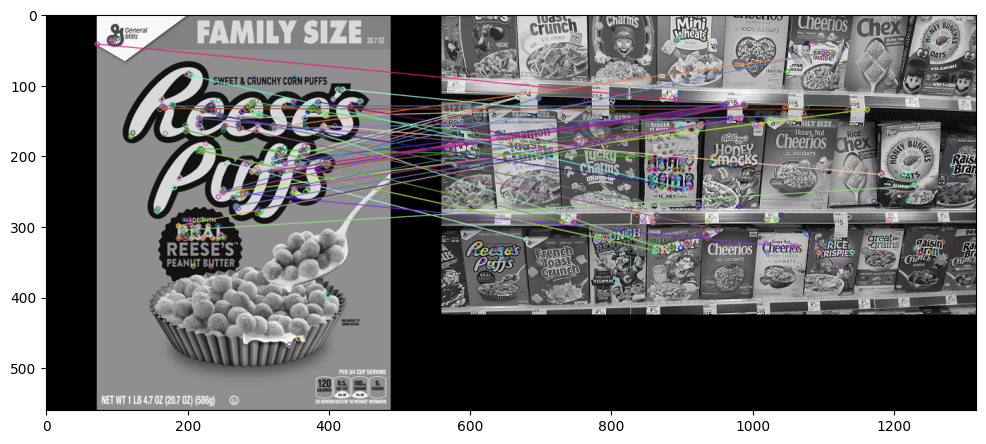

In [49]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck= True)       # Creating a BFMatcher object
matches = bf.match(dsc1,dsc2)                               # Matching the descriptors of both the objects
matches = sorted(matches, key = lambda x:x.distance)        # Sorting the sequence of matches. 

img3 = cv2.drawMatches(reeses,kp1,cereals,kp2,matches[:40],None) # Drawing the matches (Slicing of matches parameters can be done too)
display(img3)


